In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
sns.set_style("ticks")
#plt.style.use([u'fivethirtyeight',])

from joblib import load, dump
from IPython.display import display, HTML

In [2]:
MODEL_VERSION = "v4"
MODEL_SUFFIX = "%s.last_author" % MODEL_VERSION
GENDERS = ["-", "F", "M"]
GENDERS = ["UNKNOWN", "FEMALE", "MALE"]
TOP_15_ETHNICITIES = ["ENGLISH", "GERMAN", "HISPANIC", "CHINESE",
                      "JAPANESE", "SLAV", "FRENCH", "ITALIAN", "INDIAN",
                      "NORDIC", "ARAB", "DUTCH", "KOREAN", "UNKNOWN", "OTHER"]
TOP_15_COUNTRIES = ["USA", "UNKNOWN", "UK", "JAPAN", "GERMANY", "FRANCE", "ITALY",
                    "CANADA", "CHINA", "AUSTRALIA", "SPAIN", "NETHERLANDS",
                    "SWEDEN", "INDIA", "OTHER"]

In [3]:
#results_full = load("results_all_model/v2/results_all_model.v2.pkl")
results_full = load("results_all_model/%s/results_all_model_intercept.%s.pkl" % (MODEL_VERSION, MODEL_SUFFIX))

In [4]:
TOP_FEATURES = map(lambda x: x[0][0], results_full)
TOP_FEATURES

['Intercept',
 'YearSpan',
 'AuthorAge',
 'PubType',
 'Journal',
 'SinkCites',
 'SourceCites',
 'Affiliation',
 'VolumeNovelty',
 'SourceAuthors',
 'Language',
 'MeshCounts',
 'Ethnicity',
 'Gender']

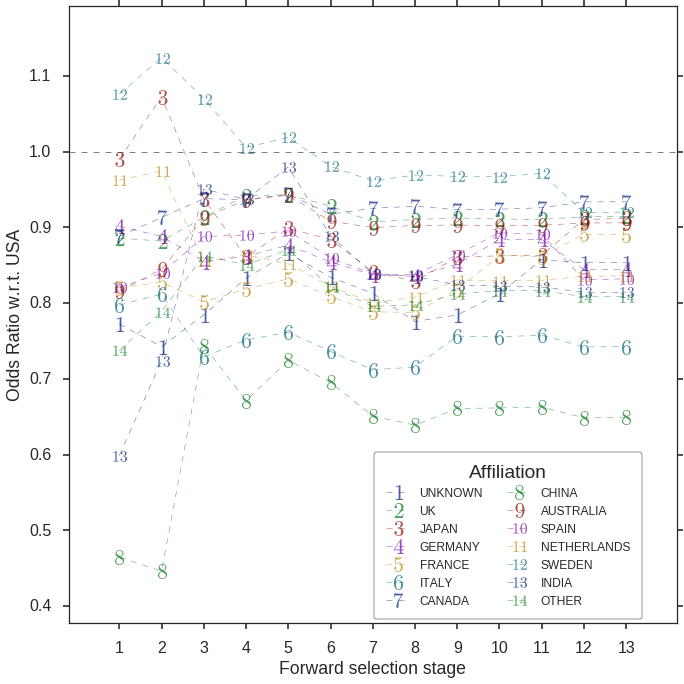

In [5]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
stages = []
title = "Affiliation"
for i, res in enumerate(results_full[1:]):
    #print "\nStage %s: " % i
    stages.append("Stage %s: %s" % (i+1, TOP_FEATURES[i]))
    found = False
    for k, (m, s) in res:
        if k == "Affiliation":
            plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("C(source_country"), "Coef."]
            found = True
    if not found:
        k, (m,s) = res[0]
        plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("C(source_country"), "Coef."]
        
colors = sns.color_palette("dark", plot_data.shape[0])
for i, (idx, l) in enumerate(zip(plot_data.index, TOP_15_COUNTRIES[1:])):
    #ax.plot(plot_data.ix[idx].values, label=l, color=colors[i], marker="$%s$" % (i+1), lw=1)
    ax.plot(np.exp(plot_data.ix[idx].values),
            label=l, color=colors[i],
            marker="$%s$" % (i+1), ms=15,
            linestyle="--", lw=0.5, alpha=0.7)
#ax.axhline(y=0, linestyle="--", lw=0.5)
ax.axhline(y=1, linestyle="--", lw=0.5, color="black")
#ax.set_ylabel("Coefficient in model")
ax.set_ylabel("Odds Ratio w.r.t. %s" % TOP_15_COUNTRIES[0])
ax.set_xticks(range(plot_data.shape[1]))
ax.set_xticklabels(range(1, plot_data.shape[1] + 1))
ax.set_xlabel("Forward selection stage")
fig.tight_layout()
lgd = fig.legend(*ax.get_legend_handles_labels(), loc="upper right", 
                 bbox_to_anchor=(0.9,0.33), ncol=2,
                 frameon=True, fancybox=True,
                 borderpad=1, prop={"size": 12},
                title = title)
plt.margins(x=0.1, y=0.1)
plt.savefig("Affiliation_coeffs.%s.pdf" % MODEL_SUFFIX, bbox_inches="tight", bbox_extra_artists=[lgd])
plot_data["Feature_Name"] = TOP_15_COUNTRIES[1:]
#plot_data

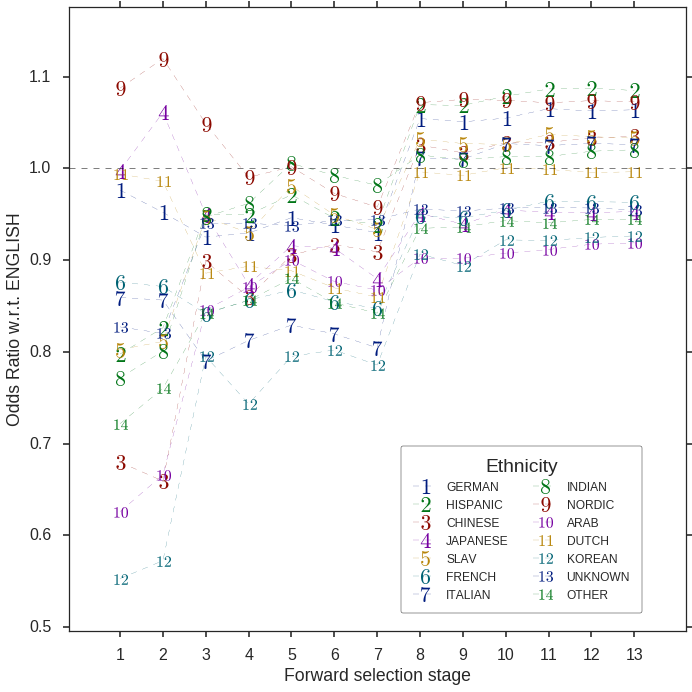

In [6]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
stages = []
title = "Ethnicity"
for i, res in enumerate(results_full[1:]):
    #print "\nStage %s: " % i
    stages.append("Stage %s: %s" % (i+1, TOP_FEATURES[i]))
    found = False
    for k, (m, s) in res:
        if k == "Ethnicity":         
            plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("mf.MC(eth1"), "Coef."]
            found = True
    if not found:
        k, (m,s) = res[0]        
        plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("mf.MC(eth1"), "Coef."]
        
colors = sns.color_palette("dark", plot_data.shape[0])
for i, (idx, l) in enumerate(zip(plot_data.index, TOP_15_ETHNICITIES[1:])):
    #ax.plot(plot_data.ix[idx].values, label=l, color=colors[i], marker="$%s$" % (i+1), lw=1)
    ax.plot(np.exp(plot_data.ix[idx].values),
            label=l, color=colors[i],
            marker="$%s$" % (i+1), ms=15,
            linestyle="--", lw=0.2)

#ax.axhline(y=0, linestyle="--", lw=0.5)
ax.axhline(y=1, linestyle="--", lw=0.5, color="black")
#ax.set_ylabel("Coefficient in model")
ax.set_ylabel("Odds Ratio w.r.t. %s" % TOP_15_ETHNICITIES[0])
ax.set_xticks(range(plot_data.shape[1]))
ax.set_xticklabels(range(1, plot_data.shape[1] + 1))
ax.set_xlabel("Forward selection stage")

plt.margins(x=0.1, y=0.1)
fig.tight_layout()
lgd = fig.legend(*ax.get_legend_handles_labels(), loc="upper right", 
                 bbox_to_anchor=(0.9,0.35), ncol=2,
                 frameon=True, fancybox=True,
                 borderpad=1, prop={"size": 12},
                title = title)
plt.savefig("Ethnicity_coeffs.%s.pdf" % MODEL_SUFFIX, bbox_inches="tight", bbox_extra_artists=[lgd])
plot_data["Feature_Name"] = TOP_15_ETHNICITIES[1:]
#plot_data

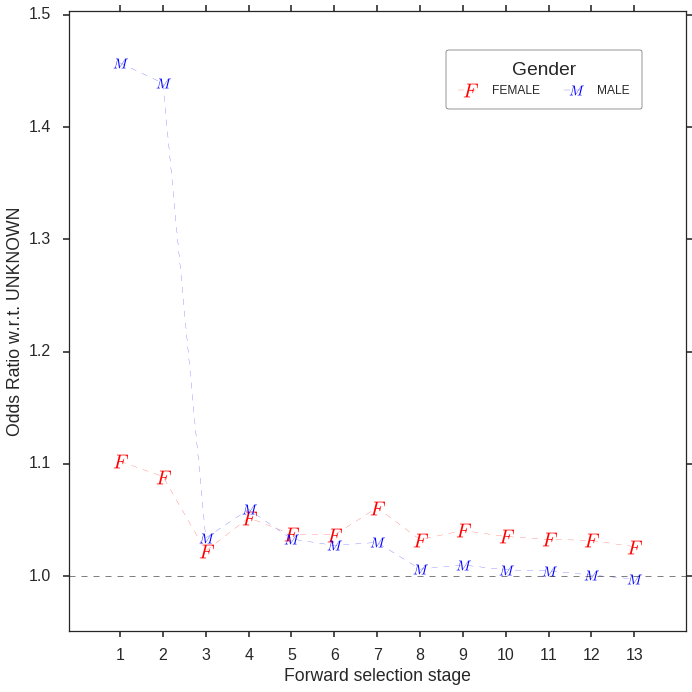

In [7]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
stages = []
title = "Gender"
for i, res in enumerate(results_full[1:]):
    #print "\nStage %s: " % i
    stages.append("Stage %s: %s" % (i+1, TOP_FEATURES[i]))
    found = False
    for k, (m, s) in res:
        if k == "Gender":
            plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("C(gender"), "Coef."]
            found = True
    if not found:
        k, (m,s) = res[0]        
        plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("C(gender"), "Coef."]
        
colors = sns.color_palette("dark", plot_data.shape[0])
colors = ["red", "blue"]
for i, (idx, l) in enumerate(zip(plot_data.index, GENDERS[1:])):
    #ax.plot(plot_data.ix[idx].values, label=l, color=colors[i], marker="$%s$" % (i+1), lw=1)
    ax.plot(np.exp(plot_data.ix[idx].values),
            label=l, color=colors[i],
            marker="$%s$" % (l[0]), ms=15,
            linestyle="--", lw=0.2)

#ax.axhline(y=0, linestyle="--", lw=0.5)
ax.axhline(y=1, linestyle="--", lw=0.5, color="black")
#ax.set_ylabel("Coefficient in model")
ax.set_ylabel("Odds Ratio w.r.t. %s" % GENDERS[0])
ax.set_xticks(range(plot_data.shape[1]))
ax.set_xticklabels(range(1, plot_data.shape[1] + 1))
ax.set_xlabel("Forward selection stage")

plt.margins(x=0.1, y=0.1)
fig.tight_layout()
lgd = fig.legend(*ax.get_legend_handles_labels(), loc="upper right", 
                 bbox_to_anchor=(0.9,0.9), ncol=2,
                 frameon=True, fancybox=True,
                 borderpad=1, prop={"size": 12},
                title = title)
plt.savefig("Gender_coeffs.%s.pdf" % MODEL_SUFFIX, bbox_inches="tight", bbox_extra_artists=[lgd])

In [8]:
print "Final Model"
results_full[-1][0][1][1]

Final Model


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                    Results: Logit
======================================================================================================================
Model:                                Logit                            Pseudo R-squared:                 0.124        
Dependent Variable:                   is_self_cite                     AIC:                              21466123.2504
Date:                                 2016-06-12 21:27                 BIC:                              21467211.3341
No. Observations:                     41618369                         Log-Likelihood:                   -1.0733e+07  
Df Model:                             69                               LL-Null:                          -1.2250e+07  
Df Residuals:                         41618299                         LLR p-value:                      0.0000       
Converged:                            1.0000                           Scale:                            1.0000       
No. Iterations:                       10.0000                                                                         
----------------------------------------------------------------------------------------------------------------------
                                                                      Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                                            -2.7897   0.0267 -104.3132 0.0000 -2.8422 -2.7373
I(year_span < 0)[T.True]                                             -0.3833   0.0146  -26.2696 0.0000 -0.4119 -0.3547
I(year_span == 0)[T.True]                                             0.7350   0.0047  157.8498 0.0000  0.7259  0.7441
mf.score_log_1(year_span)                                             1.2317   0.0113  108.8729 0.0000  1.2095  1.2538
I(mf.score_log_1(year_span) ** 2)                                    -1.4019   0.0068 -205.5559 0.0000 -1.4152 -1.3885
I(auth_prev_papers == 0)[T.True]                                     -1.2316   0.0164  -75.1366 0.0000 -1.2637 -1.1995
I(auth_prev_papers == 1)[T.True]                                     -0.1874   0.0106  -17.7109 0.0000 -0.2082 -0.1667
np.log10(auth_prev_papers + 1)                                        2.1716   0.0077  280.8068 0.0000  2.1564  2.1868
I(np.log10(auth_prev_papers + 1) ** 2)                               -0.3402   0.0022 -157.9699 0.0000 -0.3444 -0.3360
source_is_journal[T.True]                                             0.2292   0.0102   22.4372 0.0000  0.2091  0.2492
source_is_review[T.True]                                             -0.2489   0.0021 -117.1296 0.0000 -0.2530 -0.2447
source_is_case_rep[T.True]                                           -0.9476   0.0052 -181.4671 0.0000 -0.9579 -0.9374
source_is_let_ed_com[T.True]                                         -0.3433   0.0100  -34.4956 0.0000 -0.3628 -0.3238
sink_is_journal[T.True]                                               0.3238   0.0094   34.2811 0.0000  0.3053  0.3423
sink_is_review[T.True]                                               -0.6408   0.0021 -299.1382 0.0000 -0.6450 -0.6366
sink_is_case_rep[T.True]                                             -0.7313   0.0049 -147.7615 0.0000 -0.7410 -0.7216
sink_is_let_ed_com[T.True]                                           -0.2921   0.0094  -31.1641 0.0000 -0.3105 -0.2738
journal_same[T.True]                                                  0.5344   0.0022  240.9631 0.0000  0.5300  0.5387
I(jj_sim == 0)[T.True]                                               -0.2961   0.0063  -46.7627 0.0000 -0.3085 -0.2837
np.log10(jj_sim + 1)                                                  0.1261   0.0081   15.6339 0.0000  0.1103  0.1419
I(np.log10(jj_sim + 1) ** 2)                                         -0.0499

In [9]:
feature_dict = { 
	"Intercept": [u'Intercept',],
	"Gender": [
		u'C(gender, levels=GENDERS)[T.F]',
		u'C(gender, levels=GENDERS)[T.M]',
		],
	"Affiliation": [
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.UNKNOWN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.UK]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.JAPAN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.GERMANY]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.FRANCE]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.ITALY]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.CANADA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.CHINA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.AUSTRALIA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.SPAIN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.NETHERLANDS]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.SWEDEN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.INDIA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.OTHER]',
	],
	"Ethnicity": [
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[0]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[1]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[2]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[3]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[4]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[5]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[6]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[7]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[8]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[9]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[10]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[11]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[12]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[13]',
	],
	"AuthorAge": [
		u'I(auth_prev_papers == 0)[T.True]',
		u'I(auth_prev_papers == 1)[T.True]',
		u'np.log10(auth_prev_papers + 1)',
		u'I(np.log10(auth_prev_papers + 1) ** 2)',        
	],
	"SourceCites": [
		u'I(source_ncites == 1)[T.True]',
		u'np.log10(source_ncites)',
		u'I(np.log10(source_ncites) ** 2)',
		u'I(np.log10(source_ncites) ** 3)',        
	],
	"SourceAuthors": [
		u'I(source_n_authors > 20)[T.True]',
		u'np.log10(np.clip(source_n_authors, 0, 20))',
		u'I(np.log10(np.clip(source_n_authors, 0, 20)) ** 2)',
	],
	"MeshCounts": [
		u'I(source_n_mesh_ex == 0)[T.True]',
		u'I(sink_n_mesh_ex == 0)[T.True]',
		u'np.log10(source_n_mesh_ex + 1)',
		u'np.log10(sink_n_mesh_ex + 1)',
	],
	"Journal": [
		u'journal_same[T.True]',
		u'I(jj_sim == 0)[T.True]',
		u'np.log10(jj_sim + 1)',
		u'I(np.log10(jj_sim + 1) ** 2)',
	],
	"YearSpan": [
		u'I(year_span < 0)[T.True]',
		u'I(year_span == 0)[T.True]',
		u'mf.score_log_1(year_span)',
		u'I(mf.score_log_1(year_span) ** 2)',
	],
	"SinkCites": [
		u'I(sink_prev_ncites == 0)[T.True]',
		u'np.log10(sink_prev_ncites + 1)',
		u'I(np.log10(sink_prev_ncites + 1) ** 2)',
	],
	"PubType": [
		u'source_is_journal[T.True]',
		u'source_is_review[T.True]',
		u'source_is_case_rep[T.True]',
		u'source_is_let_ed_com[T.True]',
		u'sink_is_journal[T.True]',
		u'sink_is_review[T.True]',
		u'sink_is_case_rep[T.True]',
		u'sink_is_let_ed_com[T.True]',
	],
	"Language": [
		u'source_is_eng[T.True]',
		u'sink_is_eng[T.True]',
	],
	"VolumeNovelty": [
		u'np.log10(np.nan_to_num(source_V_novelty) + 1)',
		u'np.log10(np.nan_to_num(sink_V_novelty) + 1)',
		u'I(np.log10(np.nan_to_num(sink_V_novelty) + 1) ** 2)'
	]
}


In [10]:
TOP_FEATURES

['Intercept',
 'YearSpan',
 'AuthorAge',
 'PubType',
 'Journal',
 'SinkCites',
 'SourceCites',
 'Affiliation',
 'VolumeNovelty',
 'SourceAuthors',
 'Language',
 'MeshCounts',
 'Ethnicity',
 'Gender']

In [11]:
res_dict = dict(results_full[1])
idx = []
vals = []
select_cols = ["Coef.", "Std.Err.", "P>|z|"]
m, s = results_full[0][0][1]
idx.extend(s.tables[1].index.values.tolist())
vals.extend(s.tables[1][select_cols].values.tolist())
for i, k in enumerate(TOP_FEATURES[1:]):
    m, s = res_dict[k]
    idx.extend(s.tables[1].index[s.tables[1].index != "Intercept"].values.tolist())
    vals.extend(s.tables[1].ix[s.tables[1].index != "Intercept", select_cols].values.tolist())
df_first_stage = pd.DataFrame(vals, index=idx)
df_first_stage[["f%s" % i for i in range(len(select_cols))]] = results_full[-1][0][1][1].tables[1][select_cols]
df_first_stage.columns = pd.MultiIndex.from_product([["Individual","Final"], select_cols])
ordered_idx = sum([[k for _ in feature_dict[k]] for k in TOP_FEATURES], [])
df_first_stage["Categories"] = ordered_idx
df_first_stage["Sign Flip"] = (df_first_stage["Individual"]["Coef."]*df_first_stage["Final"]["Coef."]) < 0
with pd.option_context('display.max_rows', 999,
                       'display.max_columns', 10,
                      'display.precision', 5):
    display(df_first_stage.round(5))

Individual           \
                                                        Coef. Std.Err.   
Intercept                                            -2.35732  0.00055   
I(year_span < 0)[T.True]                             -1.61995  0.01409   
I(year_span == 0)[T.True]                             0.44871  0.00431   
mf.score_log_1(year_span)                            -0.40287  0.00943   
I(mf.score_log_1(year_span) ** 2)                    -0.83712  0.00603   
I(auth_prev_papers == 0)[T.True]                     -1.38923  0.01626   
I(auth_prev_papers == 1)[T.True]                     -0.26865  0.01043   
np.log10(auth_prev_papers + 1)                        1.89629  0.00735   
I(np.log10(auth_prev_papers + 1) ** 2)               -0.32228  0.00205   
source_is_journal[T.True]                             0.12908  0.00994   
source_is_review[T.True]                             -0.44104  0.00151   
source_is_case_rep[T.True]                           -0.99320  0.00504   
source_is_let_ed_com[T.True]                          0.16709  0.00967   
sink_is_journal[T.True]                               0.25939  0.00947   
sink_is_review[T.True]                               -0.65211  0.00198   
sink_is_case_rep[T.True]                             -0.66446  0.00480   
sink_is_let_ed_com[T.True]                           -0.19735  0.00940   
journal_same[T.True]                                  0.78103  0.00210   
I(jj_sim == 0)[T.True]                               -0.31038  0.00610   
np.log10(jj_sim + 1)                                  0.32667  0.00776   
I(np.log10(jj_sim + 1) ** 2)                         -0.11530  0.00236   
I(sink_prev_ncites == 0)[T.True]                      0.32923  0.00291   
np.log10(sink_prev_ncites + 1)                       -0.15813  0.00397   
I(np.log10(sink_prev_ncites + 1) ** 2)               -0.21527  0.00145   
I(source_ncites == 1)[T.True]                        -0.39296  0.01906   
np.log10(source_ncites)                              -2.69292  0.02971   
I(np.log10(source_ncites) ** 2)                       2.27298  0.02112   
I(np.log10(source_ncites) ** 3)                      -0.63402  0.00481   
C(source_country, levels=TOP_15_COUNTRIES)[T.UN...   -0.25833  0.00470   
C(source_country, levels=TOP_15_COUNTRIES)[T.UK]     -0.12130  0.00225   
C(source_country, levels=TOP_15_COUNTRIES)[T.JA...   -0.01025  0.00217   
C(source_country, levels=TOP_15_COUNTRIES)[T.GE...   -0.10398  0.00229   
C(source_country, levels=TOP_15_COUNTRIES)[T.FR...   -0.19823  0.00286   
C(source_country, levels=TOP_15_COUNTRIES)[T.IT...   -0.22653  0.00305   
C(source_country, levels=TOP_15_COUNTRIES)[T.CA...   -0.11872  0.00289   
C(source_country, levels=TOP_15_COUNTRIES)[T.CH...   -0.76640  0.00655   
C(source_country, levels=TOP_15_COUNTRIES)[T.AU...   -0.20363  0.00386   
C(source_country, levels=TOP_15_COUNTRIES)[T.SP...   -0.19763  0.00386   
C(source_country, levels=TOP_15_COUNTRIES)[T.NE...   -0.03851  0.00353   
C(source_country, levels=TOP_15_COUNTRIES)[T.SW...    0.07302  0.00404   
C(source_country, levels=TOP_15_COUNTRIES)[T.IN...   -0.51311  0.00683   
C(source_country, levels=TOP_15_COUNTRIES)[T.OT...   -0.30458  0.00169   
np.log10(np.nan_to_num(source_V_novelty) + 1)        -0.14633  0.00072   
np.log10(np.nan_to_num(sink_V_novelty) + 1)          -0.09306  0.00260   
I(np.log10(np.nan_to_num(sink_V_novelty) + 1) *...    0.01783  0.00050   
I(source_n_authors > 20)[T.True]                     -0.17476  0.01209   
np.log10(np.clip(source_n_authors, 0, 20))            0.43124  0.01262   
I(np.log10(np.clip(source_n_authors, 0, 20)) ** 2)   -0.18191  0.00941   
source_is_eng[T.True]                                 0.92755  0.00626   
sink_is_eng[T.True]                                   0.02595  0.00844   
I(source_n_mesh_ex == 0)[T.True]                      0.51351  0.00719   
I(sink_n_mesh_ex == 0)[T.True]                        2.05704  0.00709   
np.log10(source_n_mesh_ex + 1)                        0

In [12]:
set(sum([feature_dict[k] for k in TOP_FEATURES], [])) - set(df_first_stage.index.tolist())

set()

In [13]:
set(sum([feature_dict[k] for k in TOP_FEATURES], [])) - set(results_full[-1][0][1][1].tables[1].index.tolist())


set()

## Plot journal models

In [14]:
results_full_journal = load("results_all_model/%s/results_all_model.%s.journal.pkl" % (MODEL_VERSION, MODEL_SUFFIX))

In [15]:
results_full_journal = [("Overall", results_full[-1][0][1])] + results_full_journal

,Overall,Nature,Science,PNAS,NEJM,Lancet,JAMA
"C(gender, levels=GENDERS)[T.F]",0.026023,0.0,0.0,0.0,0.0,0.0,0.0
"C(gender, levels=GENDERS)[T.M]",0.000000,0.0,0.0,0.0,0.0,0.0,0.0


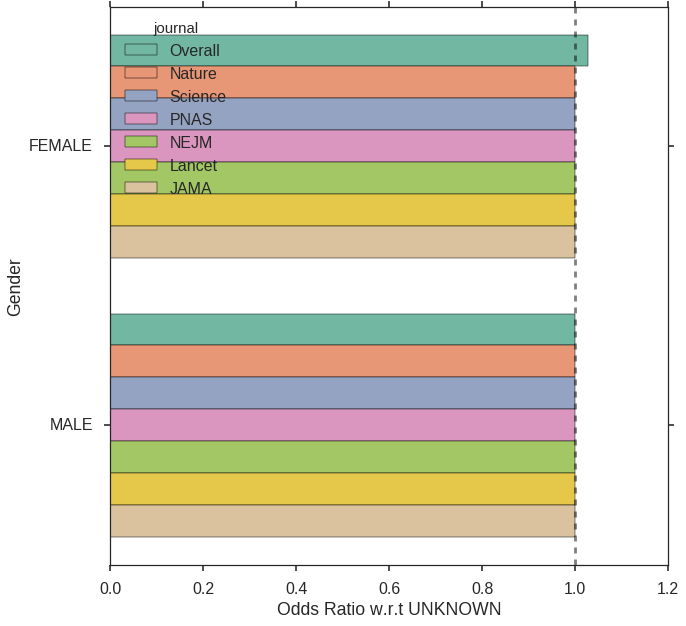

In [16]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
journals = []
GENDER_NAMES = ["UNKNOWN", "FEMALE", "MALE"]
title = "Gender"
for jid, (m, s) in results_full_journal:
    journals.append(jid)
    t = s.tables[1].ix[s.tables[1].index.str.startswith("C(gender"), ["Coef.", "P>|z|"]]
    t.ix[t["P>|z|"] > 0.005, "Coef."] = 0.
    plot_data[jid] = t["Coef."]

#plot_data["Overall"] = [-0.0208, -0.0367]
#journals.append("Overall")
display(plot_data)
        
colors = sns.color_palette("dark", plot_data.shape[0])
colors = ["red", "blue"]
pdata = pd.melt(np.exp(plot_data).reset_index(), id_vars=["index"], value_vars=plot_data.columns.tolist())
pdata.columns = ["index", "journal", "value"]
ax = sns.barplot(data=pdata,
           y="index", x="value", hue="journal",
                palette=sns.color_palette("Set2", 10))
ax.set_yticklabels(GENDER_NAMES[1:])
ax.axvline(1.0, linestyle="--", color="black", alpha=0.5)
ax.set_ylabel("Gender")
ax.set_xlabel("Odds Ratio w.r.t %s" % GENDER_NAMES[0])
plt.savefig("Gender_coeffs.%s.journal.pdf" % MODEL_SUFFIX, bbox_inches="tight")

,Overall,Nature,Science,PNAS,NEJM,Lancet,JAMA
"C(source_country, levels=TOP_15_COUNTRIES)[T.UNKNOWN]",-0.158490,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.UK]",-0.089648,0.000000,0.000000,0.000000,0.251259,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.JAPAN]",-0.092464,0.000000,0.374457,0.000000,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.GERMANY]",-0.168671,0.000000,0.000000,0.000000,0.000000,-0.343501,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.FRANCE]",-0.116278,0.000000,0.000000,0.000000,0.339000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.ITALY]",-0.297869,0.000000,0.000000,-0.276053,0.457266,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.CANADA]",-0.068626,0.000000,0.000000,-0.098755,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.CHINA]",-0.431894,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.AUSTRALIA]",-0.098880,-0.462225,0.000000,0.000000,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.SPAIN]",-0.183973,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


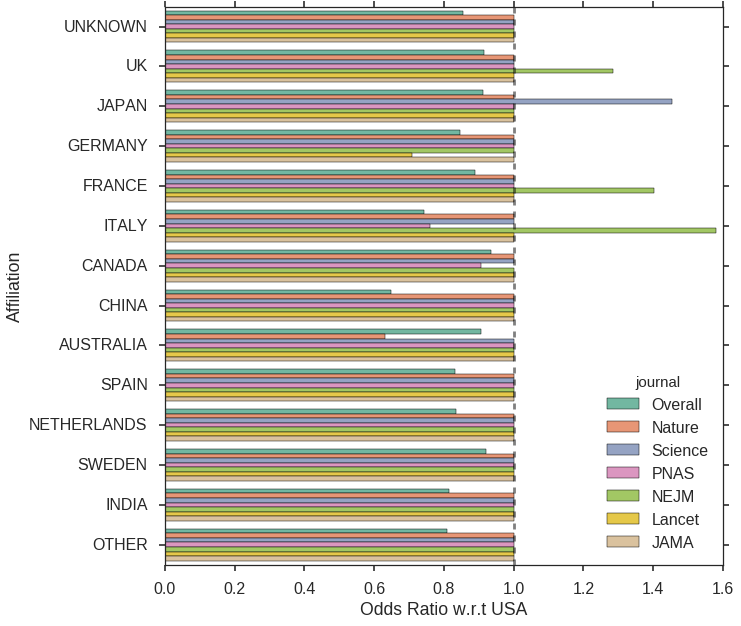

In [17]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
journals = []
title = "Affiliation"
for jid, (m, s) in results_full_journal:
    journals.append(jid)
    t = s.tables[1].ix[s.tables[1].index.str.startswith("C(source_country"), ["Coef.", "P>|z|"]]
    t.ix[t["P>|z|"] > 0.005, "Coef."] = 0.
    plot_data[jid] = t["Coef."]

display(plot_data)
        
pdata = pd.melt(np.exp(plot_data).reset_index(), id_vars=["index"], value_vars=plot_data.columns.tolist())
pdata.columns = ["index", "journal", "value"]
ax = sns.barplot(data=pdata,
           y="index", x="value", hue="journal",
                palette=sns.color_palette("Set2", 10))
ax.set_yticklabels(TOP_15_COUNTRIES[1:])
ax.axvline(1.0, linestyle="--", color="black", alpha=0.5)
ax.set_ylabel("Affiliation")
ax.set_xlabel("Odds Ratio w.r.t %s" % TOP_15_COUNTRIES[0])
plt.savefig("Affiliation_coeffs.%s.journal.pdf" % MODEL_SUFFIX, bbox_inches="tight")

,Overall,Nature,Science,PNAS,NEJM,Lancet,JAMA
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[0]",0.061975,0.130242,0.000000,0.000000,0.000000,0.0,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[1]",0.081561,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[2]",0.034333,0.000000,0.000000,0.000000,0.000000,0.0,0.365621
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[3]",-0.048160,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[4]",0.032440,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[5]",-0.037547,0.000000,0.000000,-0.154095,0.000000,0.0,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[6]",0.025605,0.000000,0.000000,0.000000,0.000000,0.0,0.400153
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[7]",0.020163,-0.324015,0.000000,0.000000,0.000000,0.0,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[8]",0.070055,0.331224,0.000000,0.000000,0.000000,0.0,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[9]",-0.084668,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


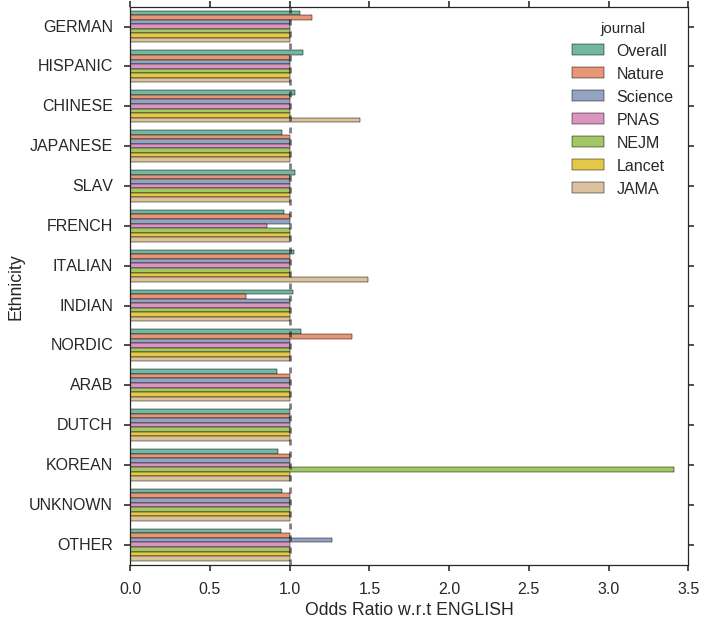

In [18]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
journals = []
title = "Affiliation"
for jid, (m, s) in results_full_journal:
    journals.append(jid)
    t = s.tables[1].ix[s.tables[1].index.str.startswith("mf.MC(eth1"), ["Coef.", "P>|z|"]]
    t.ix[t["P>|z|"] > 0.005, "Coef."] = 0.
    plot_data[jid] = t["Coef."]

display(plot_data)
        
colors = sns.color_palette("dark", plot_data.shape[0])
colors = colors = sns.color_palette("dark", plot_data.shape[0])
pdata = pd.melt(np.exp(plot_data).reset_index(), id_vars=["index"], value_vars=plot_data.columns.tolist())
pdata.columns = ["index", "journal", "value"]
ax = sns.barplot(data=pdata,
           y="index", x="value", hue="journal",
                palette=sns.color_palette("Set2", 10))
ax.set_yticklabels(TOP_15_ETHNICITIES[1:])
ax.axvline(1.0, linestyle="--", color="black", alpha=0.5)
ax.set_ylabel("Ethnicity")
ax.set_xlabel("Odds Ratio w.r.t %s" % TOP_15_ETHNICITIES[0])
plt.savefig("Ethnicity_coeffs.%s.journal.pdf" % MODEL_SUFFIX, bbox_inches="tight")

## Testing